# Setup

In [1]:
import scanpy as sc
import scvi
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
sc.settings.figdir = "/notebook/Joe/M-cells/analysis/figs_for_paper"
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code/WT_thymus'

# import data

In [5]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_3008_genes.h5ad")
model = scvi.model.SCVI.load("/notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_3008_genes", adata=adata)

INFO     File /notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_30
         08_genes/model.pt already downloaded                                                


In [6]:
de_df = model.differential_expression(
    groupby="cell_type",
)

DE...: 100%|██████████| 11/11 [00:07<00:00,  1.43it/s]


In [8]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    print(f"Saving {c} DE genes")
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]
    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]
    markers[c] = cell_type_df
    cell_type_df.to_csv(f"/notebook/Joe/M-cells/analysis/DE_all_cell_types/{c}_marker_genes.csv")

Saving Aire+ 2 DE genes
Saving Late Aire DE genes
Saving Tuft DE genes
Saving Aire+ 1 DE genes
Saving PA1 (Tspan8) DE genes
Saving Ccl21a+ DE genes
Saving TAC-TECs DE genes
Saving PA3 (Gp2) DE genes
Saving PA2 (Ascl1) DE genes
Saving cTECs DE genes
Saving PA4 (Foxj1) DE genes


# M cell signature

In [9]:
McellGenes = set(
    ["Ccl20", "Clu", "Mfge8", "Anxa5", "Pglyrp1", "Ctsh", "Serpinb6a", "H2-M2", "Gp2", "Ubd", "Lamp1", "Cxcl16", "Cyba", "Scd1", "1700011H14Rik", "Aif1", "Ctsd",
    "Tnfaip2", "Far2os2", "Slc2a6", "Adgrd1", "Ncf4", "Rnf128", "Il4i1", "Far2", "BC021614", "D630011A20Rik", "Vcam1", "Stx11", "Sdhaf1", "Ces1b", "Itga3", "Msln",
    "Scarb2", "Tnfrsf4", "Fam98a", "Tmsb4x", "Nfkbia", "Rnase1", "Vamp5", "Gulo", "Ccl9", "Serpinb1a", "Serpinb6a", "Tnfaip2", "1700011H14Rik", "Ccl6", "Ly6a", "Anxa5",
    "Spib", "Ctsh", "Fabp5", "Ccl20", "Pglyrp1", "Tmsb4x", "Rac2", "Dnase1", "Smpdl3a", "Far2os2", "Rras2", "Nqo2", "Gjb2", "1110046J04Rik", "Npc2", "Atp6v1c1", 
    "Marcksl1", "Psmb7", "Psg27", "AI118078", "Brk1", "Msln", "Tnfrsf4", "Cd63", "Rnf181", "Sox8", "Pon2", "Bcl2a1d", "Rassf2", "Aif1", "1700025G04Rik", "C4bp", "Vamp8",
    "Prr13", "Bmp2", "Rps6kl1", "Degs2", "9130008F23Rik", "Il4i1", "Gm5549", "Npdc1", "Gp2", "H2-M2", "Vamp5", "Impa1", "Gpa33", "Cnp", "Dapk2", "Rasd1", "Etfa", 
    "Mocs1", "Slc2a6", "Hars", "Stk24", "Fam131a", "Snhg18", "Pold1", "Agps", "Bcl2a1b", "Zfp36l1", "Btbd16", "Mylk", "Cpt2", "Ahcyl2", "Ier5"]
)

In [10]:
len(McellGenes)

97

In [11]:
sc.tl.score_genes(adata, gene_list=McellGenes, score_name="M_cell_enrichment")

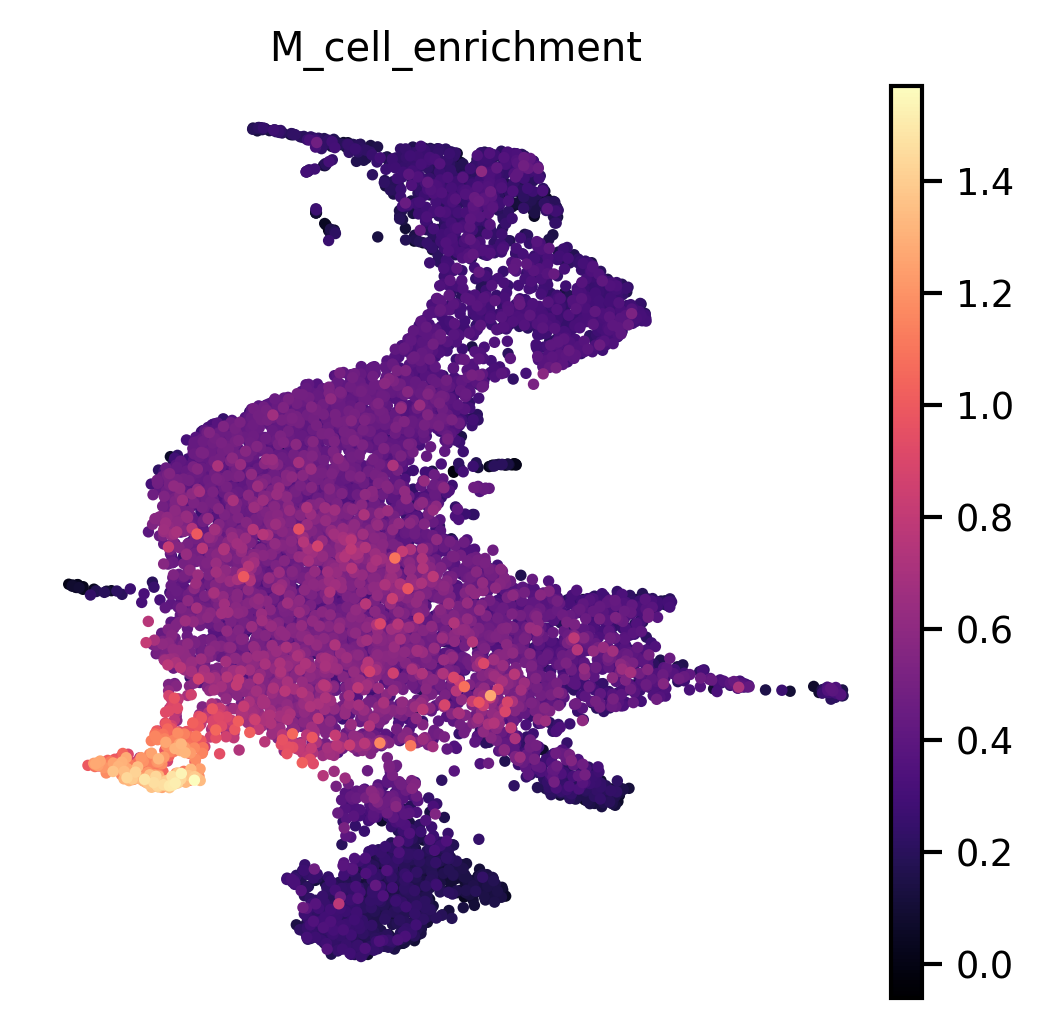

In [12]:
sc.pl.umap(
    adata,
    color="M_cell_enrichment",
    cmap="magma",
    s=30,
    save="_WT_thymus_M_cell_enrichment_score.pdf"
)

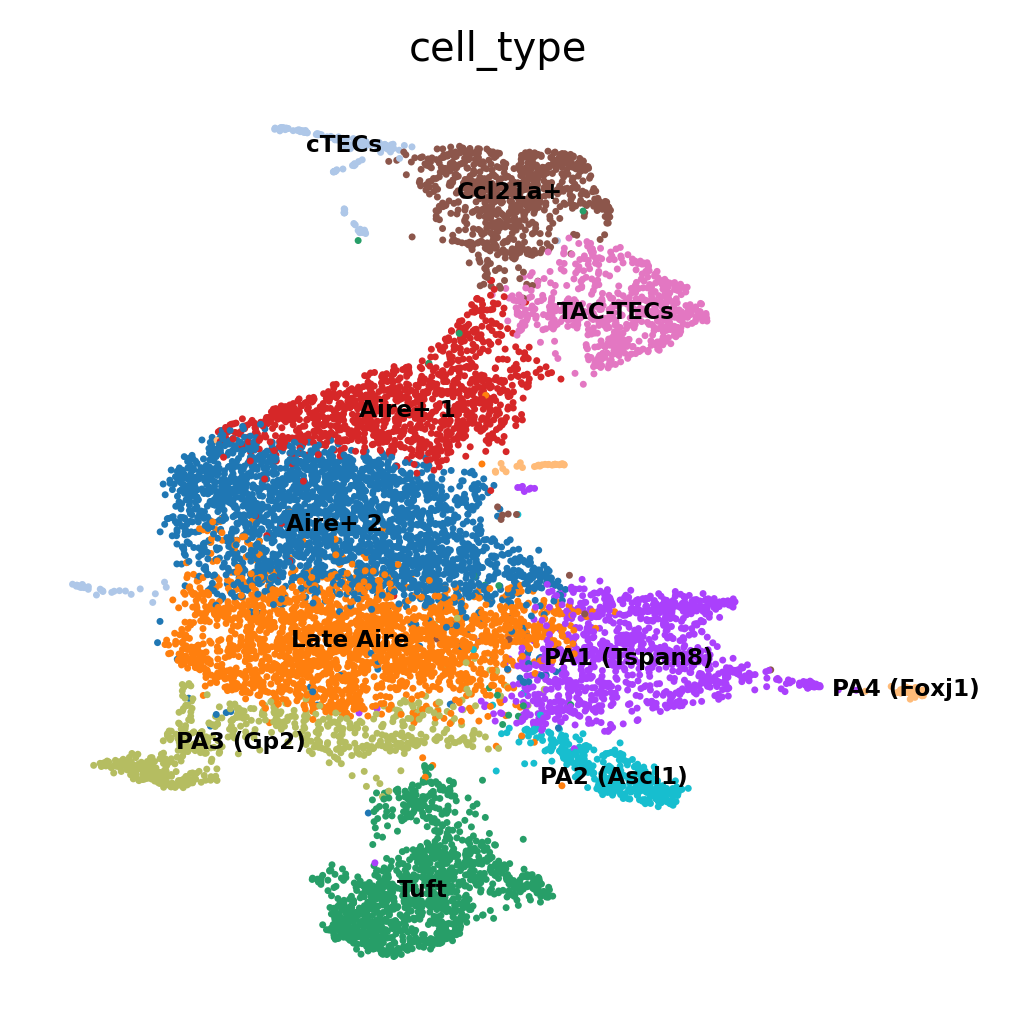

In [13]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    legend_loc="on data",
    legend_fontsize="xx-small",
    save="_WT_thymus_cell_types.pdf"
)

## DE comparison

In [15]:
McellDE = pd.read_csv("/notebook/Joe/M-cells/analysis/DE_all_cell_types/PA3 (Gp2)_marker_genes.csv", index_col=0)

In [16]:
McellDE["rank"] = [i for i in range(1,len(McellDE)+1)]
McellDE

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Clca4b,0.9880,0.0120,4.410775,0.001465,0.000093,0.0,0.25,5.192012,5.138186,2.784547,...,0.071281,0.291946,0.017869,8.350575,0.211184,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,1
2200002D01Rik,0.9834,0.0166,4.081613,0.003561,0.000508,0.0,0.25,3.234145,3.322536,1.598656,...,1.482566,0.944631,0.385960,43.430416,5.278213,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,2
Ccl6,0.9814,0.0186,3.965818,0.004976,0.000183,0.0,0.25,4.699406,4.789148,2.877264,...,0.248797,0.552013,0.064801,51.068783,0.771198,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,3
Muc13,0.9802,0.0198,3.902074,0.003028,0.000374,0.0,0.25,3.792774,3.810012,2.125547,...,0.675688,0.859060,0.161905,28.863900,2.235958,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,4
Ccl20,0.9792,0.0208,3.851782,0.013904,0.000680,0.0,0.25,4.588916,4.689972,2.984479,...,2.162505,0.781879,0.223859,203.085080,7.204190,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hepacam2,0.9246,0.0754,2.506554,0.000943,0.000638,0.0,0.25,0.847432,0.909631,2.565101,...,0.776031,0.390940,0.195484,8.229970,4.182842,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,208
Gpr183,0.9246,0.0754,2.506554,0.000408,0.000171,0.0,0.25,1.340494,1.295008,2.315027,...,0.217575,0.167785,0.080805,2.473921,1.036345,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,209
Abcg2,0.9244,0.0756,2.503688,0.000227,0.000164,0.0,0.25,0.705842,0.628980,2.456950,...,0.178105,0.263423,0.084045,2.086118,0.738425,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,210
Hpgd,0.9244,0.0756,2.503688,0.001304,0.000727,0.0,0.25,1.148240,1.218065,2.096091,...,1.073228,0.439597,0.244772,8.045965,4.938191,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,211


In [17]:
mCellGenesInData = [i for i in McellGenes if i in adata.var_names]

In [18]:
len(mCellGenesInData)

34

In [19]:
McellDE[McellDE.index.isin(mCellGenesInData)]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Ccl6,0.9814,0.0186,3.965818,0.004976,0.000183,0.0,0.25,4.699406,4.789148,2.877264,...,0.248797,0.552013,0.064801,51.068783,0.771198,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,3
Ccl20,0.9792,0.0208,3.851782,0.013904,0.000680,0.0,0.25,4.588916,4.689972,2.984479,...,2.162505,0.781879,0.223859,203.085080,7.204190,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,5
C4bp,0.9788,0.0212,3.832326,0.000556,0.000073,0.0,0.25,3.621157,3.623082,2.277358,...,0.062248,0.347315,0.035837,3.494280,0.219033,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,6
Ccl9,0.9780,0.0220,3.794467,0.003585,0.000262,0.0,0.25,4.113862,4.167516,2.351623,...,0.470686,0.791946,0.135690,39.887600,1.579605,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,7
Serpinb1a,0.9600,0.0400,3.178054,0.016645,0.002719,0.0,0.25,2.910420,2.853952,2.099114,...,7.933087,0.976510,0.699656,203.800350,30.894540,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,32
Gp2,0.9578,0.0422,3.122219,0.004739,0.000668,0.0,0.25,2.880031,2.837485,3.451122,...,1.921659,0.442953,0.169563,63.468880,7.604229,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,43
Adgrd1,0.9506,0.0494,2.957143,0.001565,0.000280,0.0,0.25,2.700631,2.697323,2.326568,...,0.535286,0.602349,0.205106,16.271520,2.379434,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,65
Sox8,0.9504,0.0496,2.952892,0.000481,0.000098,0.0,0.25,2.288270,2.332852,2.627918,...,0.109966,0.429530,0.077860,4.271454,0.540781,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,66
Serpinb6a,0.9486,0.0514,2.915349,0.016042,0.001349,0.0,0.25,2.737100,2.631750,2.216224,...,3.146302,0.954698,0.764556,182.746800,14.038151,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,72
Gjb2,0.9454,0.0546,2.851574,0.003748,0.001039,0.0,0.25,2.308829,2.159029,1.867987,...,2.424455,0.869128,0.484340,40.216938,9.875252,True,PA3 (Gp2) vs Rest,PA3 (Gp2),Rest,84
